In [48]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

rootFolder = "/home/giangtm/Work/Projects/DataScience/dataset/"
d= pd.read_csv(rootFolder + "Project_Speed_Data_2.csv")
d.sort_values(['project_type', 'project_name'], ascending=[False, True], inplace=True)
d.head()

,project_id,project_name,project_type,form_name,step,real_speed,estimate_speed,different
5,59b0c7f7fc13ae6bd7000069,001_140102_Ancestry_42882_Texas,Type_Proof,Form_1,Capture,183.74,189.43,3.00
6,59b0c7f7fc13ae6bd700006a,001_160108_Ancestry_45741_Lutheran_Bayern3,Type_Proof,Form_1,Capture,222.60,196.12,-13.50
8,59b0c7f7fc13ae6bd700006c,001_170106_Ancestry_47392_EN_UPDATE_RoyalNavy,Type_Proof,Form_1,Capture,68.92,131.71,47.67
13,59b0c7f7fc13ae6bd7000071,002_130103_SAGA_504510,Type_Proof,Form_1,Capture,212.09,126.23,-68.02
14,59b0c7f7fc13ae6bd7000072,002_140102_Ancestry_41548_NARA,Type_Proof,Form_1,Capture,226.90,125.65,-80.58


In [49]:
d.describe()

,real_speed,estimate_speed,different
count,1000.000000,1000.000000,1000.000000
mean,169.438170,123.950800,-58.163970
std,74.963935,43.210235,99.759182
min,40.200000,50.290000,-467.500000
25%,105.425000,85.290000,-103.612500
50%,168.485000,123.410000,-37.315000
75%,234.157500,161.660000,15.372500
max,300.000000,199.990000,78.070000


In [50]:
count_size = d.groupby(['project_type', 'step']).size()
count_size

project_type   step   
CustomProgram  Capture    152
Invoice        Capture      8
Library        Capture      4
Mailrespone    Capture    446
Management     Capture      1
Other Model    Capture    165
Type_Proof     Capture    224
dtype: int64

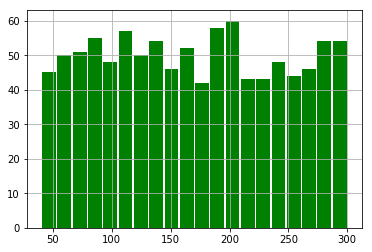

In [64]:
d['real_speed'].hist(bins=20,rwidth=0.9,facecolor='g')


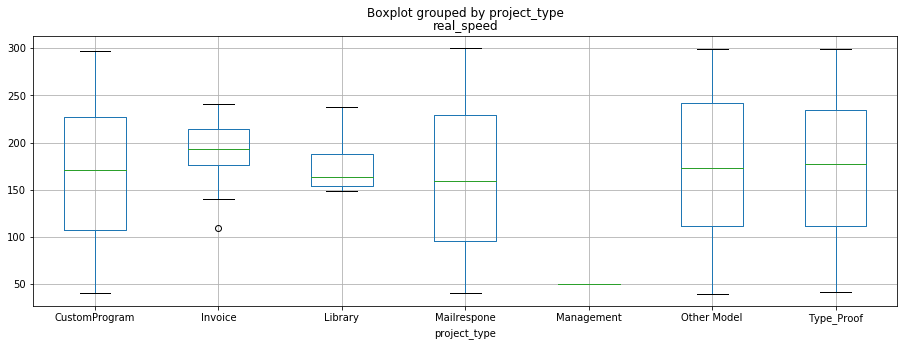

In [59]:
d.boxplot(figsize=(15,5), column='real_speed', by = 'project_type')

In [53]:
# GROUP PROJECT BY TYPE
df_project_type = d.groupby(by="project_type")
df_project_type.describe()


different                                                  \
                  count       mean         std     min      25%     50%   
project_type                                                              
CustomProgram     152.0 -60.159934  106.116676 -408.14 -105.570 -31.335   
Invoice             8.0 -40.186250   44.777765  -96.99  -79.625 -36.325   
Library             4.0 -71.607500   22.985352 -101.19  -83.790 -67.480   
Mailrespone       446.0 -53.307309  100.708486 -467.50  -94.130 -32.100   
Management          1.0  22.800000         NaN   22.80   22.800  22.800   
Other Model       165.0 -66.784182  101.820698 -411.01 -119.910 -50.420   
Type_Proof        224.0 -60.893259   94.168283 -399.08 -105.220 -42.895   

                              estimate_speed               ...              \
                   75%    max          count        mean   ...         75%   
project_type                                               ...               
CustomProgram  13.8500  74.93          152.0  123.919737   ...    162.7675   
Invoice       -14.7475  30.48            8.0  140.257500   ...    159.1800   
Library       -55.2975 -50.28            4.0  104.972500   ...    115.5200   
Mailrespone    18.2825  78.07          446.0  124.329552   ...    162.0600   
Management     22.8000  22.80            1.0   65.660000   ...     65.6600   
Other Model    15.1100  68.87          165.0  123.493636   ...    161.5100   
Type_Proof      7.3100  72.42          224.0  123.571250   ...    159.1425   

                      real_speed                                           \
                  max      count        mean        std     min       25%   
project_type                                                                
CustomProgram  198.69      152.0  168.294737  72.352654   40.78  107.8275   
Invoice        195.10        8.0  188.926250  44.752240  109.93  176.0175   
Library        133.46        4.0  178.687500  40.367732  149.44  154.2250   
Mailrespone    199.59      446.0  164.921390  77.904692   40.76   96.2975   
Management      65.66        1.0   50.690000        NaN   50.69   50.6900   
Other Model    199.14      165.0  175.997333  74.147602   40.20  111.7200   
Type_Proof     199.99      224.0  174.044732  72.233543   41.49  111.7475   

                                          
                   50%       75%     max  
project_type                              
CustomProgram  171.220  226.9425  297.16  
Invoice        193.645  214.6750  240.68  
Library        163.880  188.3425  237.55  
Mailrespone    159.100  229.8675  300.00  
Management      50.690   50.6900   50.69  
Other Model    173.450  241.6200  298.94  
Type_Proof     177.850  235.1375  299.51  

[7 rows x 24 columns]

In [54]:
# AVERAGE TIME (MEAN) AFTER GROUP BY
avg_time = df_project_type.mean()
avg_time.head()

,real_speed,estimate_speed,different
project_type,,,
CustomProgram,168.294737,123.919737,-60.159934
Invoice,188.926250,140.257500,-40.186250
Library,178.687500,104.972500,-71.607500
Mailrespone,164.921390,124.329552,-53.307309
Management,50.690000,65.660000,22.800000


In [55]:
# STD TIME (MEAN) AFTER GROUP BY
std_time = df_project_type.std()
std_time.head()

,real_speed,estimate_speed,different
project_type,,,
CustomProgram,72.352654,42.869804,106.116676
Invoice,44.752240,29.009347,44.777765
Library,40.367732,23.241459,22.985352
Mailrespone,77.904692,44.276478,100.708486
Management,NaN,NaN,NaN
